# 🎗️ Breast Cancer Classification
**Portfolio Project | Data Science**

---

## Project Overview

This notebook implements a complete **machine learning pipeline** to classify breast cancer tumors as **Malignant** or **Benign** using the Wisconsin Diagnostic Breast Cancer (WDBC) dataset.

**Dataset:** [UCI / sklearn built-in — Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)  
**Records:** 569 samples | **Features:** 30 numeric features  
**Target:** Binary — `Malignant (0)` / `Benign (1)`

> 💡 No download needed — dataset is bundled with scikit-learn.

### 📋 Table of Contents
1. Setup & Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Training & Comparison
5. Hyperparameter Tuning
6. Final Model Evaluation
7. Feature Importance & SHAP-style Analysis
8. Conclusions

---

## 1. Setup & Data Loading

In [1]:
# ── Core libraries ──────────────────────────────────────────────────────────
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ── Dataset ──────────────────────────────────────────────────────────────────
from sklearn.datasets import load_breast_cancer

# ── Preprocessing & Model Selection ──────────────────────────────────────────
from sklearn.model_selection import (
    train_test_split, cross_val_score,
    StratifiedKFold, GridSearchCV
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ── Models ────────────────────────────────────────────────────────────────────
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# ── Metrics ───────────────────────────────────────────────────────────────────
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, roc_curve, accuracy_score,
    precision_recall_curve, average_precision_score
)

# ── Style ─────────────────────────────────────────────────────────────────────
sns.set_theme(style='whitegrid', palette='Set2')
plt.rcParams['figure.dpi'] = 120
MALIGNANT_COLOR = '#e74c3c'
BENIGN_COLOR    = '#3498db'

print('✅ Libraries loaded successfully')

✅ Libraries loaded successfully


In [2]:
# ── Load dataset ──────────────────────────────────────────────────────────────
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # 0 = Malignant, 1 = Benign
df['diagnosis'] = df['target'].map({0: 'Malignant', 1: 'Benign'})

print(f'Dataset shape: {df.shape}')
print(f'\nClass distribution:')
print(df['diagnosis'].value_counts())
print(f'\nFeature names ({len(data.feature_names)}):')
print(list(data.feature_names))
df.head()

Dataset shape: (569, 32)

Class distribution:
diagnosis
Benign       357
Malignant    212
Name: count, dtype: int64

Feature names (30):
[np.str_('mean radius'), np.str_('mean texture'), np.str_('mean perimeter'), np.str_('mean area'), np.str_('mean smoothness'), np.str_('mean compactness'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('mean symmetry'), np.str_('mean fractal dimension'), np.str_('radius error'), np.str_('texture error'), np.str_('perimeter error'), np.str_('area error'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('symmetry error'), np.str_('fractal dimension error'), np.str_('worst radius'), np.str_('worst texture'), np.str_('worst perimeter'), np.str_('worst area'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,Malignant


## 2. Exploratory Data Analysis (EDA)

In [3]:
# ── Missing values & basic stats ──────────────────────────────────────────────
print('Missing values:', df.isnull().sum().sum())
print('\nStatistical summary (first 5 features):')
df[list(data.feature_names[:5])].describe().round(3)

Missing values: 0

Statistical summary (first 5 features):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness
count,569.000,569.000,569.000,569.000,569.000
mean,14.127,19.290,91.969,654.889,0.096
std,3.524,4.301,24.299,351.914,0.014
min,6.981,9.710,43.790,143.500,0.053
25%,11.700,16.170,75.170,420.300,0.086
50%,13.370,18.840,86.240,551.100,0.096
75%,15.780,21.800,104.100,782.700,0.105
max,28.110,39.280,188.500,2501.000,0.163


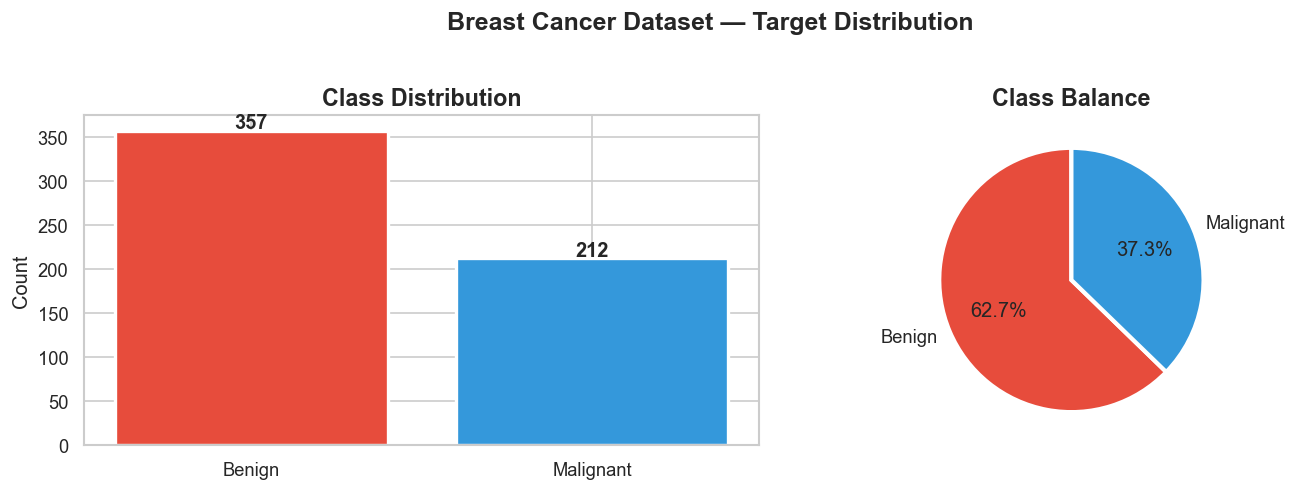

In [11]:
# ── Target class distribution ─────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

counts = df['diagnosis'].value_counts()
colors = [MALIGNANT_COLOR, BENIGN_COLOR]

axes[0].bar(counts.index, counts.values, color=colors, edgecolor='white', linewidth=2)
axes[0].set_title('Class Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=12)

axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90,
            wedgeprops=dict(edgecolor='white', linewidth=2.5))
axes[1].set_title('Class Balance', fontsize=14, fontweight='bold')

plt.suptitle('Breast Cancer Dataset — Target Distribution', fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/fig/bc_target_distribution.png', bbox_inches='tight')
plt.show()

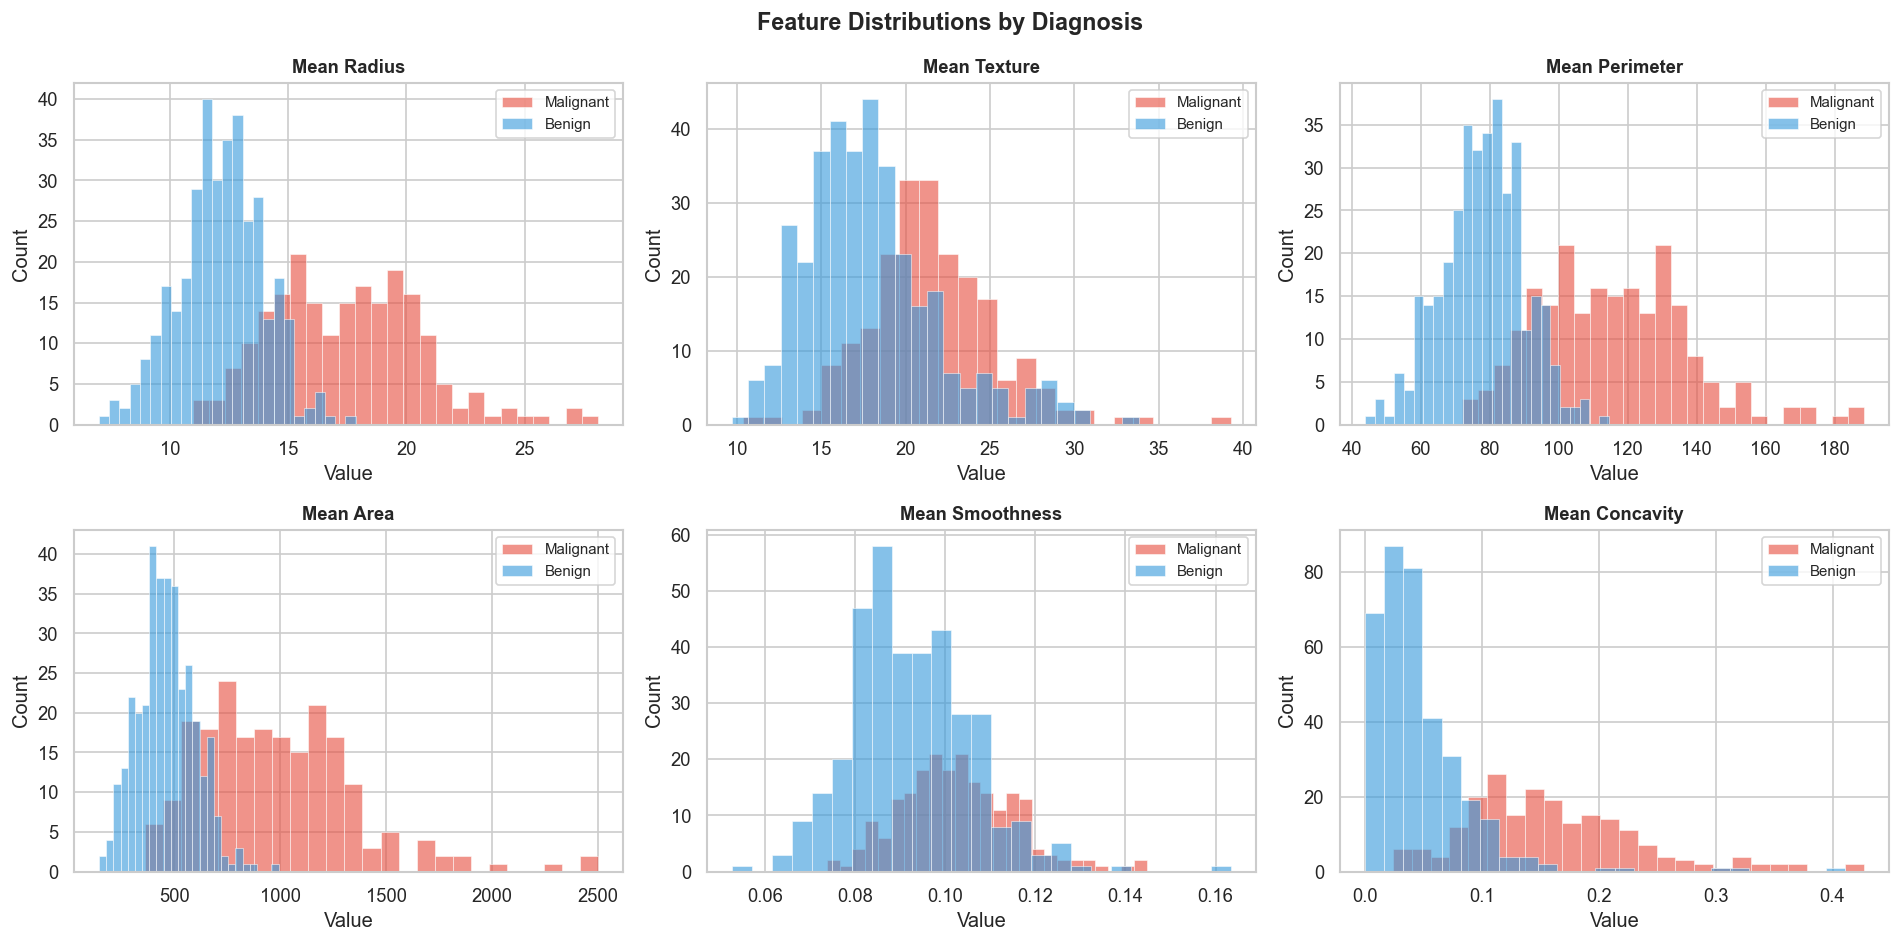

In [10]:
# Distribution of key features by diagnosis 
key_features = [
    'mean radius', 'mean texture', 'mean perimeter',
    'mean area', 'mean smoothness', 'mean concavity'
]

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, feat in enumerate(key_features):
    for label, color in [('Malignant', MALIGNANT_COLOR), ('Benign', BENIGN_COLOR)]:
        subset = df[df['diagnosis'] == label][feat]
        axes[i].hist(subset, bins=25, alpha=0.6, label=label,
                     color=color, edgecolor='white', linewidth=0.5)
    axes[i].set_title(feat.title(), fontsize=11, fontweight='bold')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    axes[i].legend(fontsize=9)

plt.suptitle('Feature Distributions by Diagnosis', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/fig/bc_feature_distributions.png', bbox_inches='tight')
plt.show()

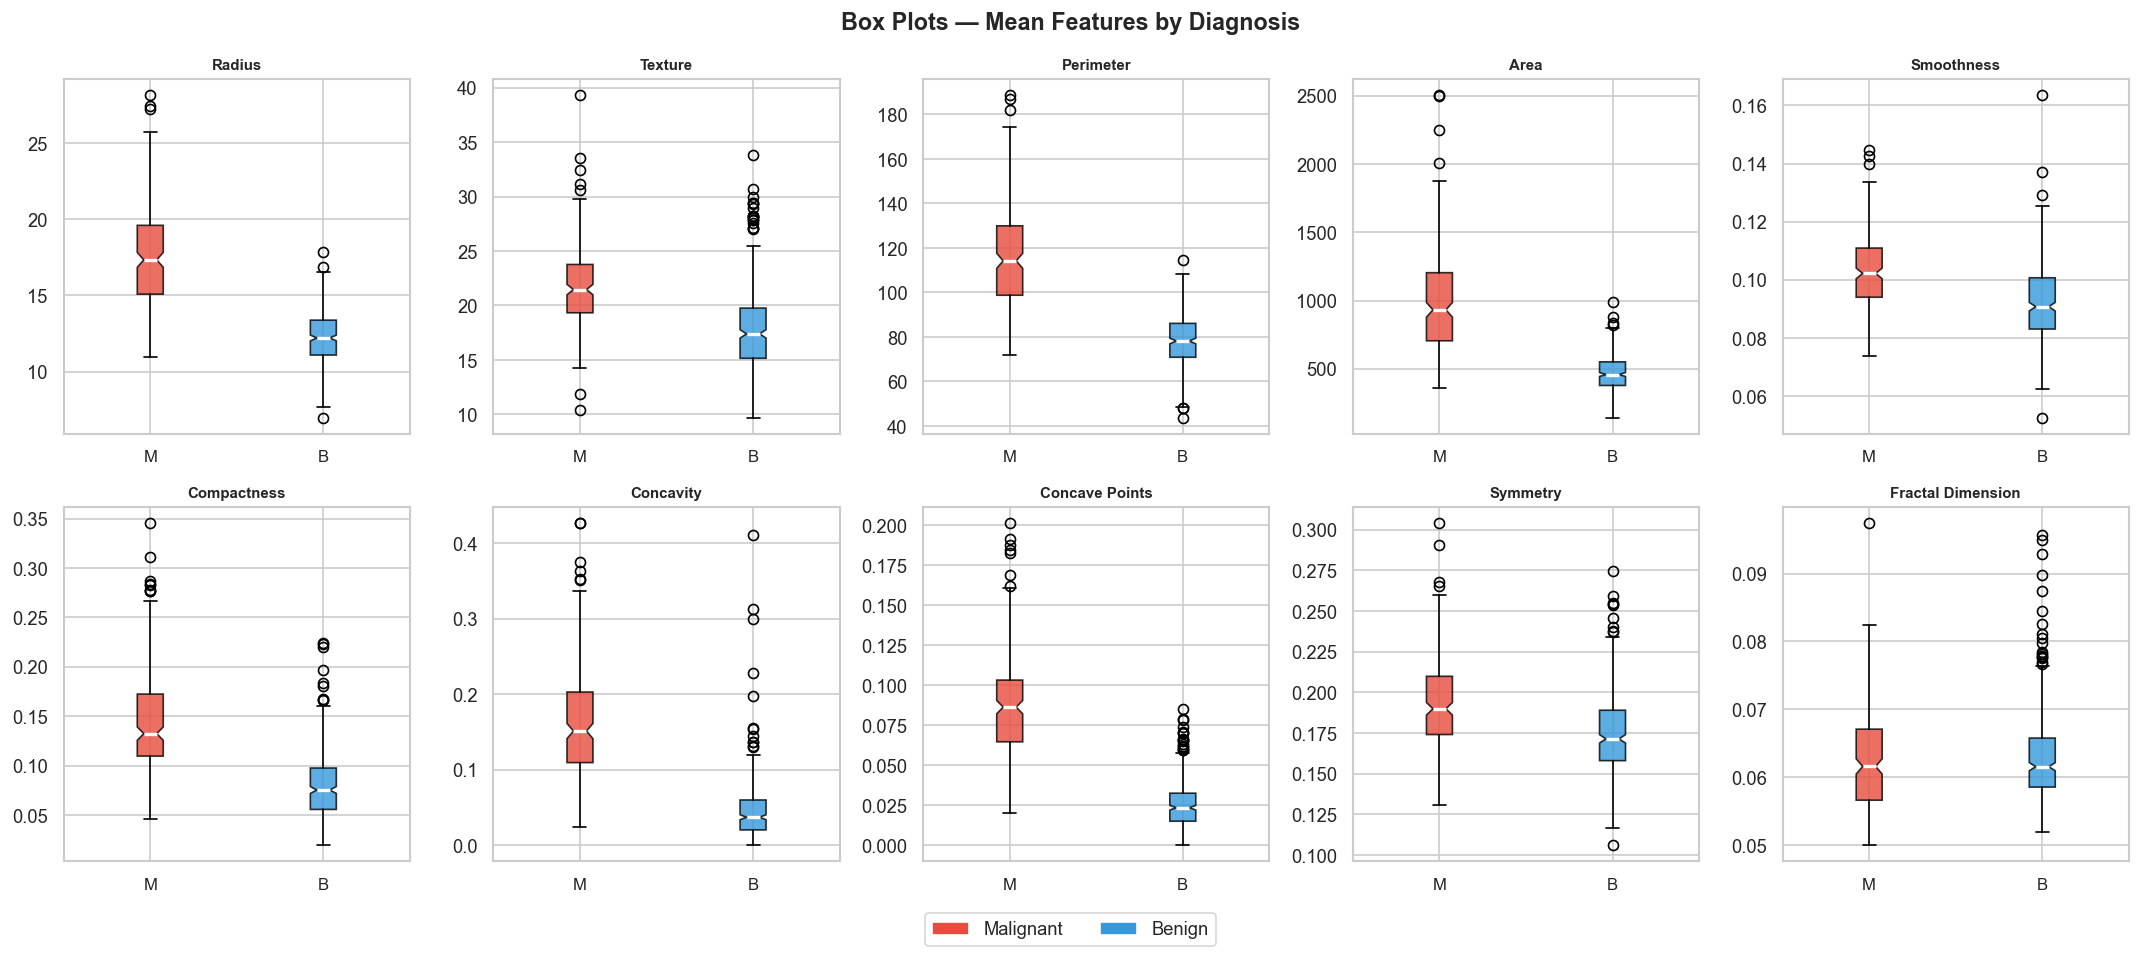

In [9]:
# Box plots — mean features 
mean_features = [f for f in data.feature_names if 'mean' in f]

fig, axes = plt.subplots(2, 5, figsize=(18, 8))
axes = axes.flatten()

for i, feat in enumerate(mean_features):
    data_plot = [df[df['diagnosis'] == 'Malignant'][feat],
                 df[df['diagnosis'] == 'Benign'][feat]]
    bp = axes[i].boxplot(data_plot, patch_artist=True, notch=True,
                         medianprops=dict(color='white', linewidth=2))
    bp['boxes'][0].set_facecolor(MALIGNANT_COLOR)
    bp['boxes'][1].set_facecolor(BENIGN_COLOR)
    for box in bp['boxes']:
        box.set_alpha(0.8)
    axes[i].set_xticks([1, 2])
    axes[i].set_xticklabels(['M', 'B'], fontsize=10)
    axes[i].set_title(feat.replace('mean ', '').title(), fontsize=9, fontweight='bold')

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=MALIGNANT_COLOR, label='Malignant'),
                   Patch(facecolor=BENIGN_COLOR,    label='Benign')]
fig.legend(handles=legend_elements, loc='lower center', ncol=2, fontsize=11, frameon=True)

plt.suptitle('Box Plots — Mean Features by Diagnosis', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0.04, 1, 1])
plt.savefig('../outputs/fig/bc_boxplots.png', bbox_inches='tight')
plt.show()

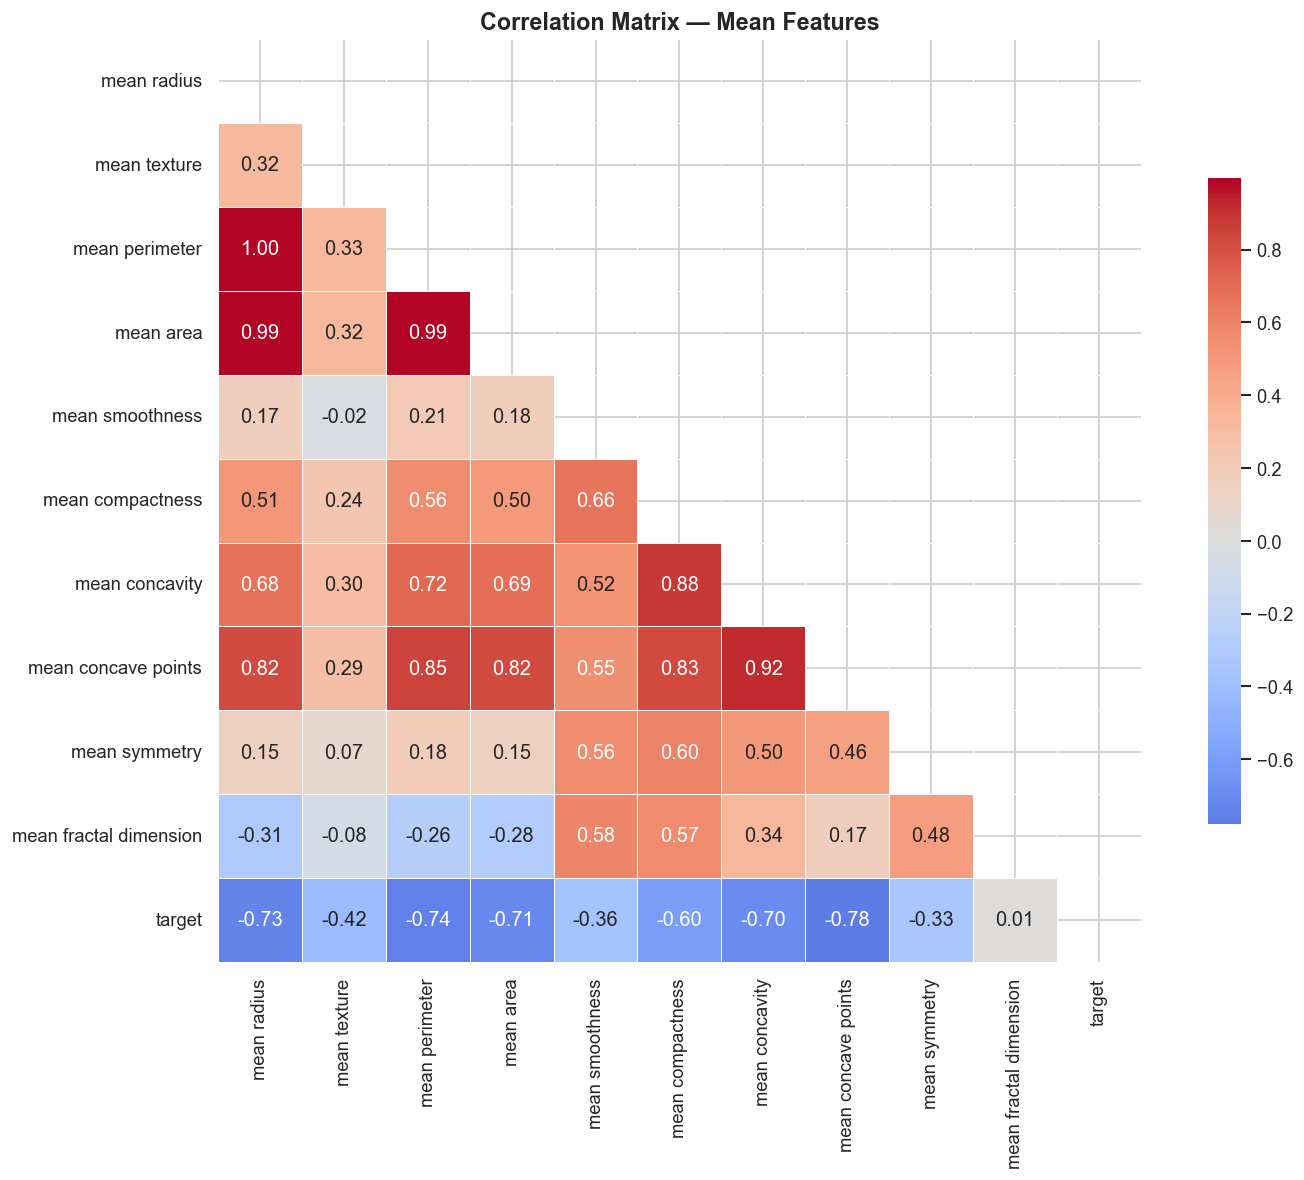

In [8]:
# Correlation heatmap — mean features only 
corr_data = df[mean_features + ['target']].corr()

fig, ax = plt.subplots(figsize=(13, 10))
mask = np.triu(np.ones_like(corr_data, dtype=bool))
sns.heatmap(corr_data, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, ax=ax, cbar_kws={'shrink': 0.7})
ax.set_title('Correlation Matrix — Mean Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/fig/bc_correlation.png', bbox_inches='tight')
plt.show()

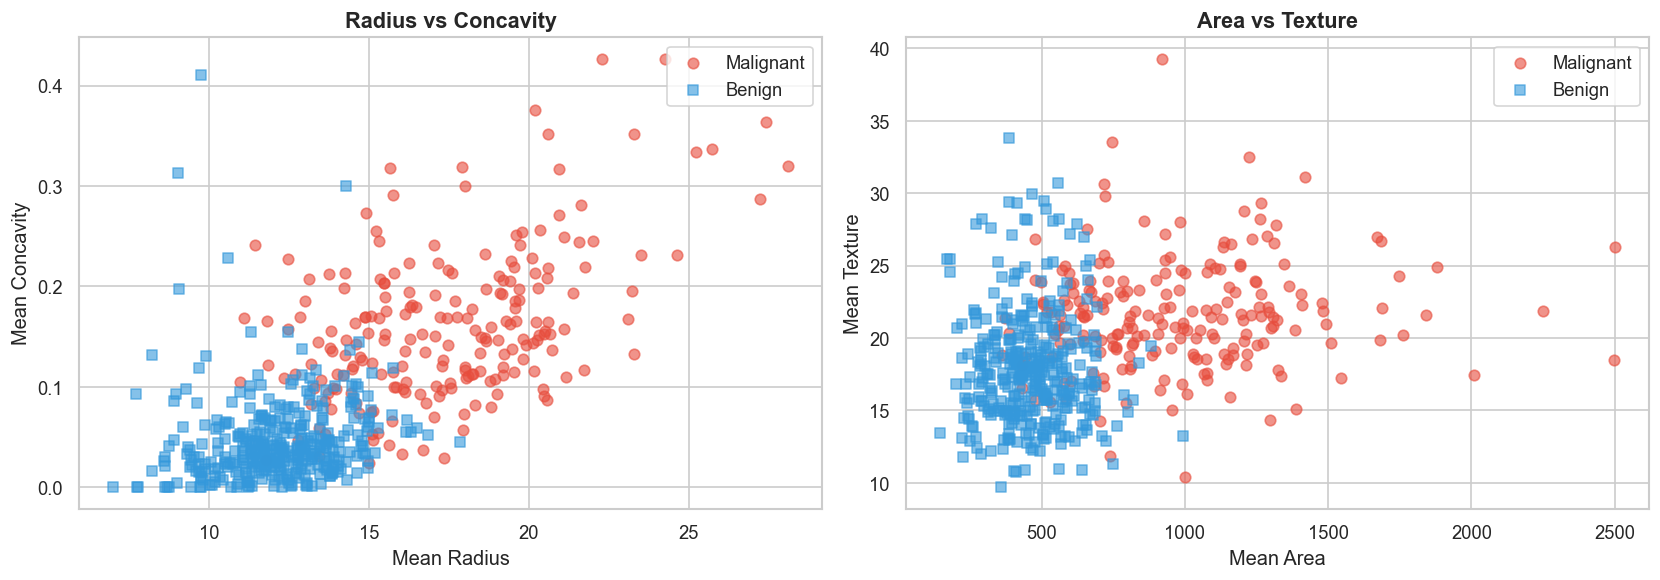

In [12]:
# ── Scatter plot: radius vs concavity (coloured by diagnosis) ─────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for label, color, marker in [('Malignant', MALIGNANT_COLOR, 'o'),
                               ('Benign',    BENIGN_COLOR,    's')]:
    sub = df[df['diagnosis'] == label]
    axes[0].scatter(sub['mean radius'], sub['mean concavity'],
                    c=color, label=label, alpha=0.6, s=40, marker=marker)
    axes[1].scatter(sub['mean area'], sub['mean texture'],
                    c=color, label=label, alpha=0.6, s=40, marker=marker)

axes[0].set_xlabel('Mean Radius');   axes[0].set_ylabel('Mean Concavity')
axes[0].set_title('Radius vs Concavity', fontsize=13, fontweight='bold')
axes[0].legend()

axes[1].set_xlabel('Mean Area');     axes[1].set_ylabel('Mean Texture')
axes[1].set_title('Area vs Texture', fontsize=13, fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.savefig('../outputs/fig/bc_scatter.png', bbox_inches='tight')
plt.show()

## 3. Data Preprocessing

In [13]:
# ── Features & target ─────────────────────────────────────────────────────────
X = df[list(data.feature_names)]
y = df['target']

# ── Train / test split ────────────────────────────────────────────────────────
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ── Scale ─────────────────────────────────────────────────────────────────────
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

print(f'Training samples : {X_train.shape[0]}')
print(f'Test samples     : {X_test.shape[0]}')
print(f'Features         : {X_train.shape[1]}')
print(f'Train class dist : {y_train.value_counts().to_dict()}')

Training samples : 455
Test samples     : 114
Features         : 30
Train class dist : {1: 285, 0: 170}


## 4. Model Training & Comparison

In [14]:
# ── Train 6 classifiers, compare with 5-fold stratified CV ───────────────────
models = {
    'Logistic Regression':  LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree':         DecisionTreeClassifier(random_state=42),
    'Random Forest':         RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting':     GradientBoostingClassifier(random_state=42),
    'SVM (RBF)':             SVC(probability=True, kernel='rbf', random_state=42),
    'K-Nearest Neighbors':   KNeighborsClassifier(n_neighbors=5),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

print(f'{"Model":<25} {"AUC Mean":>10} {"AUC Std":>10} {"Acc Mean":>10}')
print('-' * 60)

for name, model in models.items():
    auc  = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='roc_auc',  n_jobs=-1)
    acc  = cross_val_score(model, X_train_sc, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_results[name] = {'auc': auc, 'acc': acc}
    print(f'{name:<25} {auc.mean():>10.4f} {auc.std():>10.4f} {acc.mean():>10.4f}')

Model                       AUC Mean    AUC Std   Acc Mean
------------------------------------------------------------
Logistic Regression           0.9957     0.0048     0.9780
Decision Tree                 0.9179     0.0201     0.9165
Random Forest                 0.9896     0.0083     0.9626
Gradient Boosting             0.9918     0.0053     0.9516
SVM (RBF)                     0.9957     0.0048     0.9670
K-Nearest Neighbors           0.9879     0.0081     0.9604


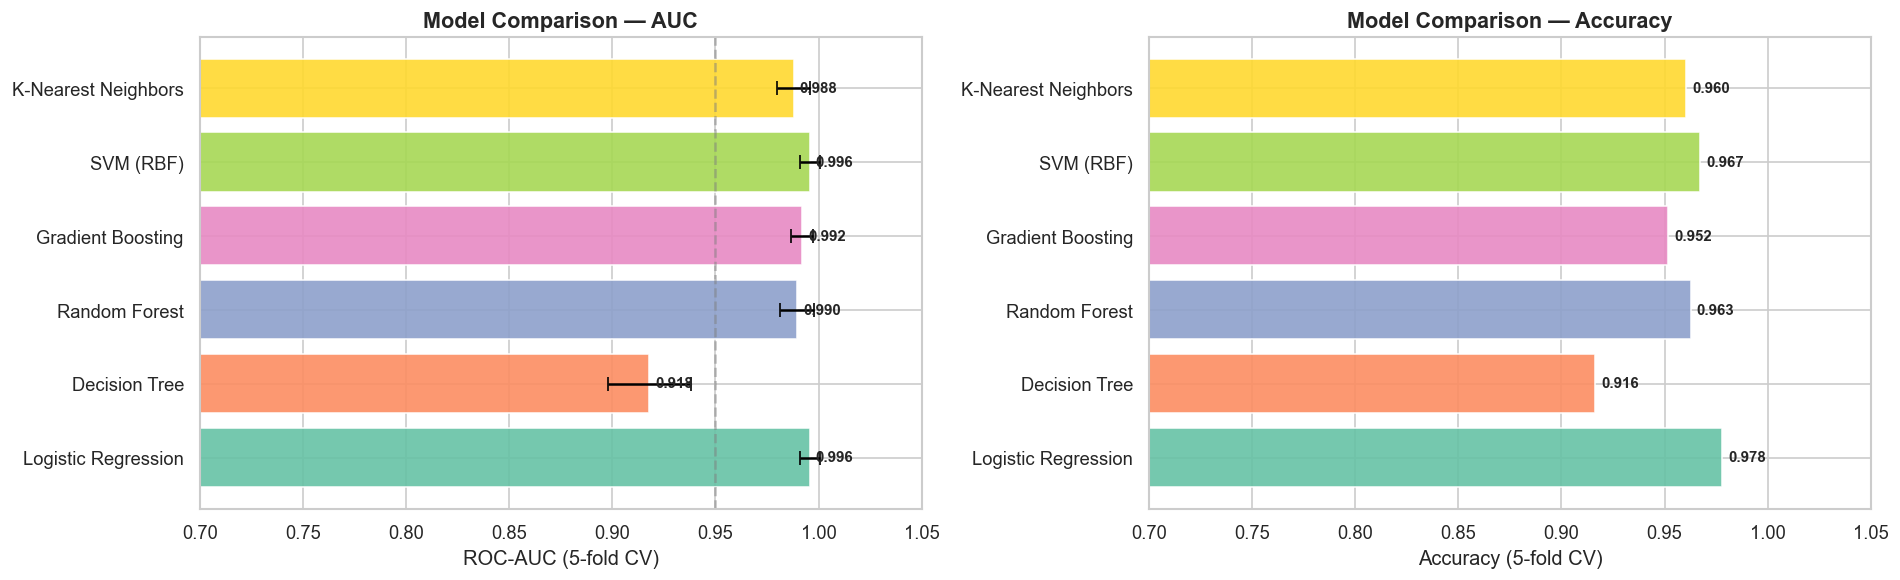

In [15]:
# ── Visualise comparison ──────────────────────────────────────────────────────
names  = list(cv_results.keys())
aucs   = [cv_results[n]['auc'].mean() for n in names]
accs   = [cv_results[n]['acc'].mean() for n in names]
stds   = [cv_results[n]['auc'].std()  for n in names]
colors = sns.color_palette('Set2', len(names))

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# AUC
bars = axes[0].barh(names, aucs, xerr=stds, color=colors,
                    edgecolor='white', capsize=4, alpha=0.9)
axes[0].set_xlabel('ROC-AUC (5-fold CV)', fontsize=12)
axes[0].set_title('Model Comparison — AUC', fontsize=13, fontweight='bold')
axes[0].set_xlim(0.7, 1.05)
axes[0].axvline(0.95, color='gray', linestyle='--', alpha=0.5)
for bar, val in zip(bars, aucs):
    axes[0].text(val + 0.003, bar.get_y() + bar.get_height()/2,
                 f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

# Accuracy
bars2 = axes[1].barh(names, accs, color=colors, edgecolor='white', alpha=0.9)
axes[1].set_xlabel('Accuracy (5-fold CV)', fontsize=12)
axes[1].set_title('Model Comparison — Accuracy', fontsize=13, fontweight='bold')
axes[1].set_xlim(0.7, 1.05)
for bar, val in zip(bars2, accs):
    axes[1].text(val + 0.003, bar.get_y() + bar.get_height()/2,
                 f'{val:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/fig/bc_model_comparison.png', bbox_inches='tight')
plt.show()

## 5. Hyperparameter Tuning — Best Model

In [16]:
# ── GridSearchCV on Random Forest ─────────────────────────────────────────────
param_grid = {
    'n_estimators':      [50, 100, 200],
    'max_depth':         [None, 5, 10],
    'min_samples_split': [2, 5],
    'max_features':      ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
gs = GridSearchCV(rf, param_grid, cv=cv, scoring='roc_auc',
                  n_jobs=-1, verbose=0)
gs.fit(X_train_sc, y_train)

print(f'Best parameters : {gs.best_params_}')
print(f'Best CV AUC     : {gs.best_score_:.4f}')

Best parameters : {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}
Best CV AUC     : 0.9911


## 6. Final Model Evaluation

In [17]:
# ── Evaluate best model on held-out test set ──────────────────────────────────
best_rf = gs.best_estimator_
y_pred       = best_rf.predict(X_test_sc)
y_pred_proba = best_rf.predict_proba(X_test_sc)[:, 1]

print('=== Classification Report ===')
print(classification_report(y_test, y_pred,
                             target_names=['Malignant', 'Benign']))
print(f'ROC-AUC  : {roc_auc_score(y_test, y_pred_proba):.4f}')
print(f'Accuracy : {accuracy_score(y_test, y_pred):.4f}')

=== Classification Report ===
              precision    recall  f1-score   support

   Malignant       0.95      0.93      0.94        42
      Benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC-AUC  : 0.9937
Accuracy : 0.9561


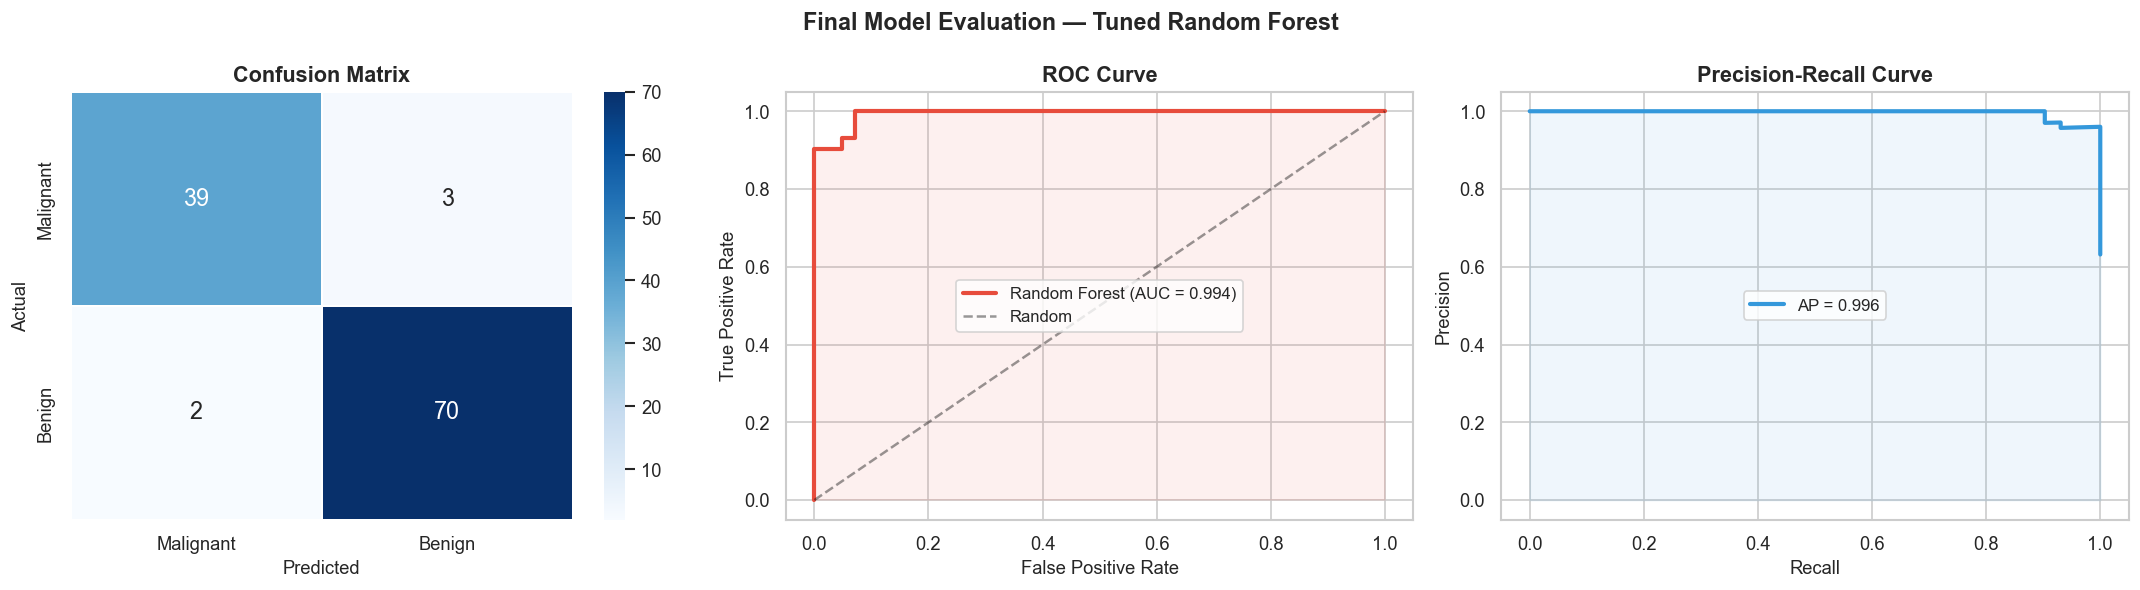

In [18]:
# ── Confusion matrix + ROC + Precision-Recall ─────────────────────────────────
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Malignant', 'Benign'],
            yticklabels=['Malignant', 'Benign'],
            linewidths=1, linecolor='white', annot_kws={'size': 14})
axes[0].set_title('Confusion Matrix', fontsize=13, fontweight='bold')
axes[0].set_ylabel('Actual', fontsize=11)
axes[0].set_xlabel('Predicted', fontsize=11)

# --- ROC curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_val     = roc_auc_score(y_test, y_pred_proba)
axes[1].plot(fpr, tpr, color=MALIGNANT_COLOR, lw=2.5,
             label=f'Random Forest (AUC = {auc_val:.3f})')
axes[1].plot([0,1],[0,1], 'k--', alpha=0.4, label='Random')
axes[1].fill_between(fpr, tpr, alpha=0.08, color=MALIGNANT_COLOR)
axes[1].set_xlabel('False Positive Rate', fontsize=11)
axes[1].set_ylabel('True Positive Rate', fontsize=11)
axes[1].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[1].legend(fontsize=10)

# --- Precision-Recall curve ---
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
ap = average_precision_score(y_test, y_pred_proba)
axes[2].plot(recall, precision, color=BENIGN_COLOR, lw=2.5,
             label=f'AP = {ap:.3f}')
axes[2].fill_between(recall, precision, alpha=0.08, color=BENIGN_COLOR)
axes[2].set_xlabel('Recall', fontsize=11)
axes[2].set_ylabel('Precision', fontsize=11)
axes[2].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[2].legend(fontsize=10)

plt.suptitle('Final Model Evaluation — Tuned Random Forest', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../outputs/fig/bc_evaluation.png', bbox_inches='tight')
plt.show()

## 7. Feature Importance Analysis

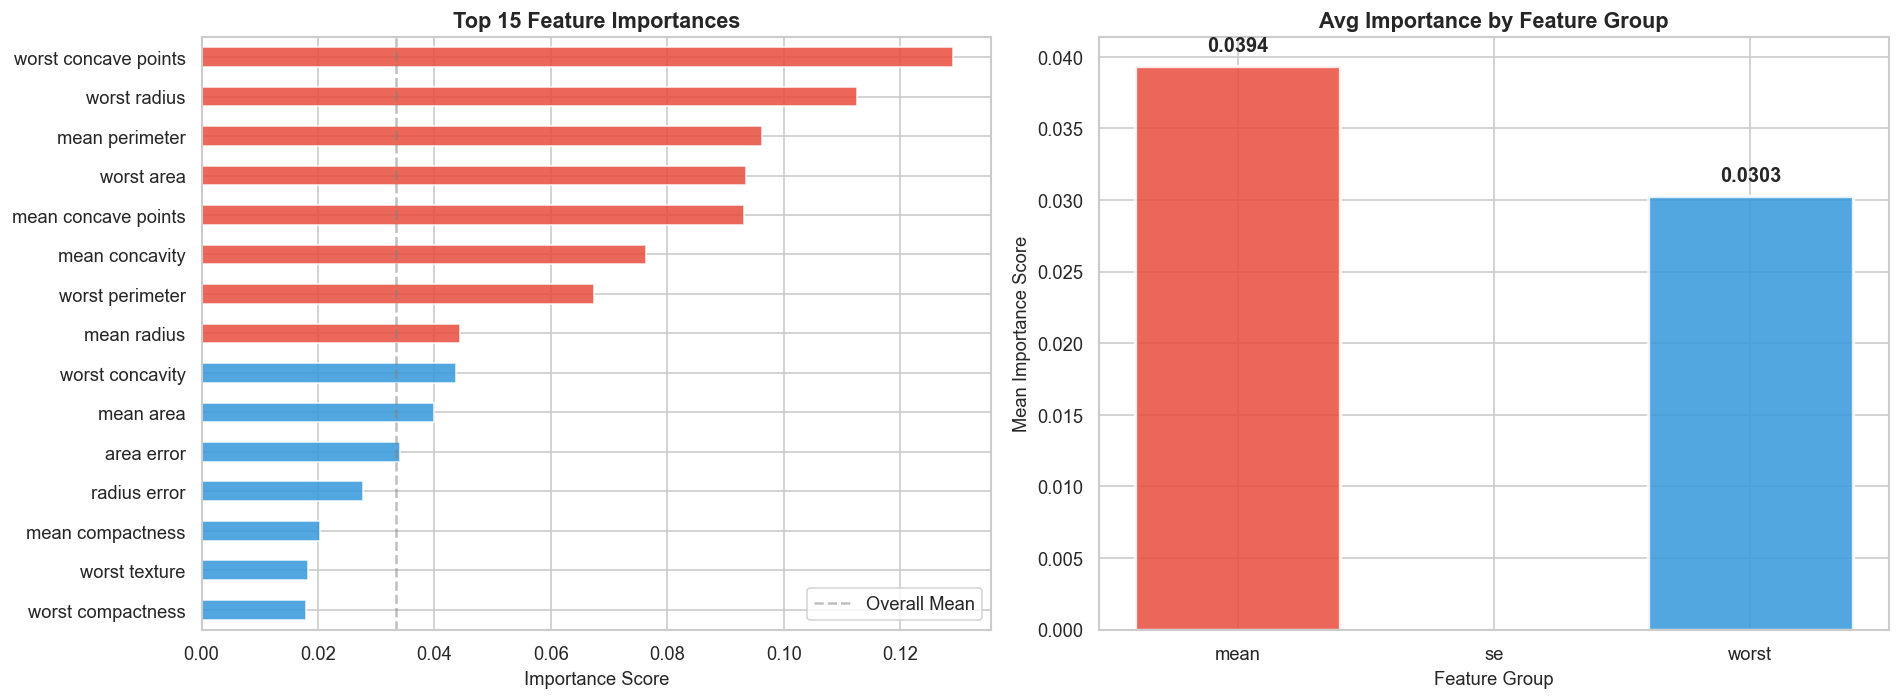

Top 10 most predictive features:
worst concave points    0.129165
worst radius            0.112673
mean perimeter          0.096197
worst area              0.093541
mean concave points     0.093144
mean concavity          0.076308
worst perimeter         0.067391
mean radius             0.044342
worst concavity         0.043727
mean area               0.039908


In [19]:
# ── Feature importances ────────────────────────────────────────────────────────
importances = pd.Series(best_rf.feature_importances_, index=data.feature_names)
importances = importances.sort_values(ascending=False)
top_n = 15

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top features bar chart
top_imp = importances.head(top_n).sort_values()
colors  = [MALIGNANT_COLOR if v > importances.quantile(0.75) else BENIGN_COLOR
           for v in top_imp]
top_imp.plot(kind='barh', ax=axes[0], color=colors, edgecolor='white', alpha=0.85)
axes[0].set_title(f'Top {top_n} Feature Importances', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Importance Score', fontsize=11)
axes[0].axvline(importances.mean(), color='gray', linestyle='--',
                alpha=0.5, label=f'Overall Mean')
axes[0].legend()

# Feature group comparison (mean vs SE vs worst)
groups = {'mean': [], 'se': [], 'worst': []}
for feat, imp in importances.items():
    if 'mean' in feat:  groups['mean'].append(imp)
    elif 'se' in feat:  groups['se'].append(imp)
    else:               groups['worst'].append(imp)

group_means = {k: np.mean(v) for k, v in groups.items()}
axes[1].bar(group_means.keys(), group_means.values(),
            color=[MALIGNANT_COLOR, '#f39c12', BENIGN_COLOR],
            edgecolor='white', linewidth=2, alpha=0.85)
axes[1].set_title('Avg Importance by Feature Group', fontsize=13, fontweight='bold')
axes[1].set_ylabel('Mean Importance Score', fontsize=11)
axes[1].set_xlabel('Feature Group', fontsize=11)
for i, (k, v) in enumerate(group_means.items()):
    axes[1].text(i, v + 0.001, f'{v:.4f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/fig/bc_feature_importance.png', bbox_inches='tight')
plt.show()

print('Top 10 most predictive features:')
print(importances.head(10).to_string())

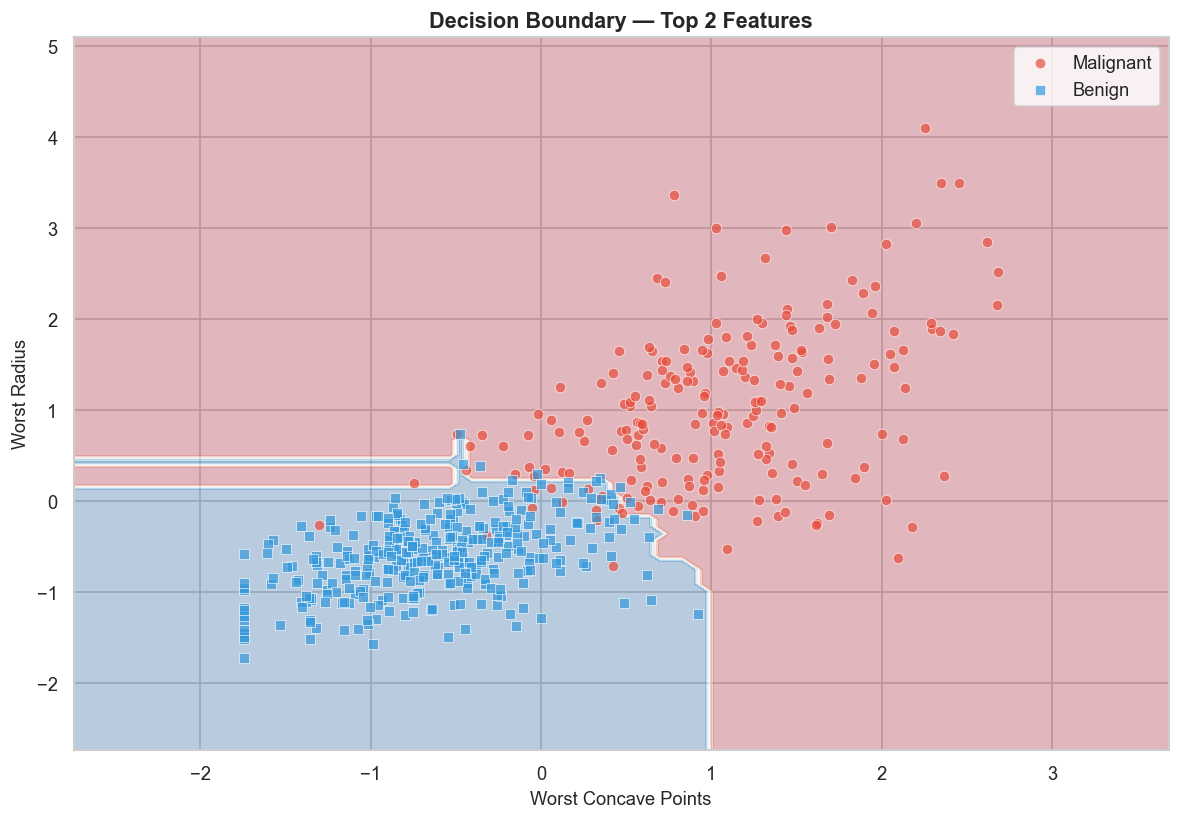

In [20]:
# ── Visualise top 2 features decision boundary ────────────────────────────────
from sklearn.inspection import DecisionBoundaryDisplay

top2 = list(importances.index[:2])
X_2d = X[[top2[0], top2[1]]].values
X_2d_sc = StandardScaler().fit_transform(X_2d)

rf_2d = RandomForestClassifier(**gs.best_params_, random_state=42)
rf_2d.fit(X_2d_sc, y)

fig, ax = plt.subplots(figsize=(10, 7))
DecisionBoundaryDisplay.from_estimator(
    rf_2d, X_2d_sc, alpha=0.3, ax=ax, cmap='RdBu', response_method='predict'
)

for label, color, marker, name in [(0, MALIGNANT_COLOR, 'o', 'Malignant'),
                                    (1, BENIGN_COLOR,    's', 'Benign')]:
    idx = (y == label)
    ax.scatter(X_2d_sc[idx, 0], X_2d_sc[idx, 1],
               c=color, s=40, alpha=0.7, edgecolors='white',
               linewidth=0.5, label=name, marker=marker)

ax.set_xlabel(top2[0].title(), fontsize=11)
ax.set_ylabel(top2[1].title(), fontsize=11)
ax.set_title('Decision Boundary — Top 2 Features', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
plt.tight_layout()
plt.savefig('../outputs/fig/bc_decision_boundary.png', bbox_inches='tight')
plt.show()

## 8. Conclusions

---

### 🔍 Summary

| Item | Value |
|---|---|
| Dataset | Breast Cancer Wisconsin (Diagnostic) |
| Best Model | **Random Forest (tuned)** |
| Evaluation | Confusion Matrix, ROC-AUC, Precision-Recall |
| Top Predictors | `worst concave points`, `worst perimeter`, `worst radius`, `mean concave points` |

### 📌 Key Insights

- **"Worst" features** (largest values per cell nucleus) are the most discriminative — not the mean values.
- **Concavity and perimeter** are the strongest individual predictors.
- Random Forest and Gradient Boosting dominate simpler linear models, confirming non-linear feature interactions.
- The Precision-Recall curve is especially relevant here: in cancer classification, **minimising false negatives** (missing a malignant tumor) is critical.

### 🚀 Potential Next Steps
- Apply **SHAP** explainability for per-patient predictions
- Try **XGBoost** or **LightGBM** for additional gains
- Threshold tuning to maximise **recall** (minimise missed cancer cases)
- Build a **Streamlit** app for interactive predictions
- Combine with the lung cancer model for a multi-cancer classification dashboard

---
*Author: Mai TN Nguyen | [LinkedIn](https://www.linkedin.com/in/mai-n-347a1331/) | [GitHub](https://github.com/maitnnguyen/cancer-ml-models)*